Summary:
In this notebook, we discuss two examples of topological data analysis (TDA) techniques being used for image analysis. We then analyze the MNIST database of handwritten digits [http://yann.lecun.com/exdb/mnist/] using similar techniques. 

In the first example, we run lower_star_img_new() on an image of nuts and bolts. This will distinguish the nuts (that are oriented so you can see through the hole) from the bolts. The image of the nuts and bolts comes from the paper "Persistence Curves: A Canonical Framework For Summarizing Persistence Diagrams" by Chung and Lawson (see Figure 1).

In [74]:
%run TDA_helper_functions.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as la
import pandas as pd
import hdbscan
import imageio


from ripser import ripser, lower_star_img
from persim import plot_diagrams
from scipy import sparse
from sklearn.decomposition import PCA

There are 8 H_0 points with significant lifetimes.
There are 4 H_1 points with significant lifetimes.


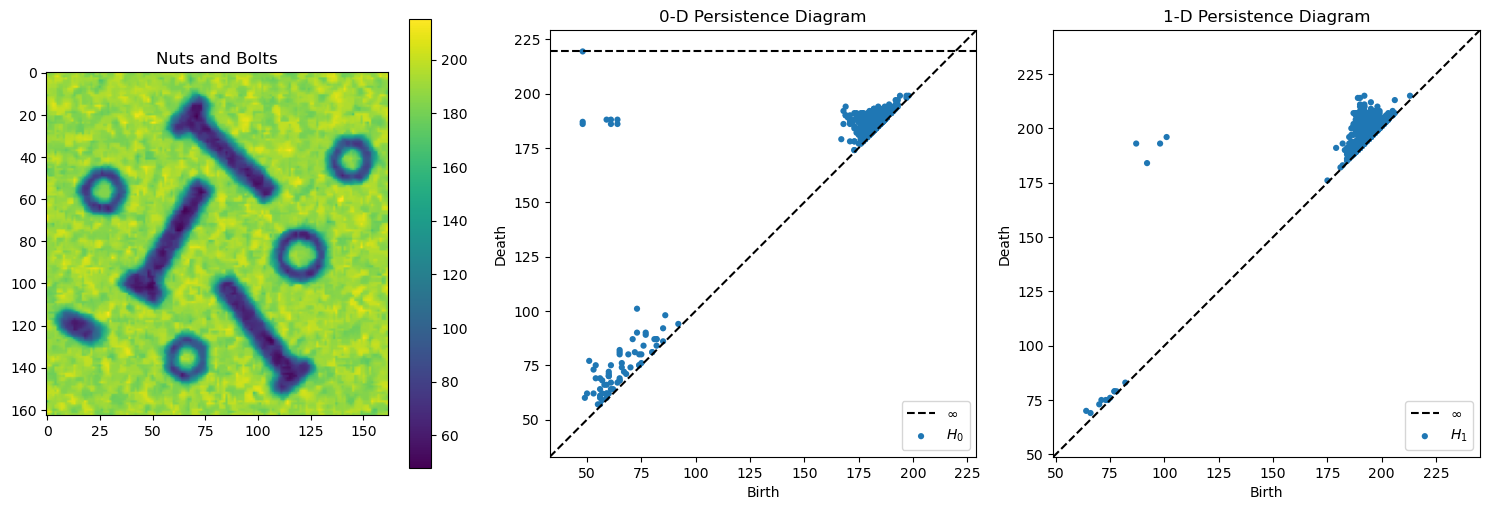

In [75]:
#Example 1: nuts and bolts example

NB = imageio.imread('TDA_Nuts_Bolts.png')

NB_im = 255 - NB[:,:,0] #invert image so nuts & bolts appear in sublevelsets
dgm = lower_star_img_new(NB_im)

dgm0 = dgm[0]
dgm1 = dgm[1]


#make a lists of H0 and H1-points with long lifetimes (longer that 30) to eliminate the noise
H0_pts = []
for pt in dgm0:
    if pt[1] - pt[0] > 30:
        H0_pts.append(pt)
print('There are ' + str(len(H0_pts)) + ' H_0 points with significant lifetimes.')
        
H1_pts = []
for pt in dgm1:
    if pt[1] - pt[0] > 30:
        H1_pts.append(pt) 
        
print('There are ' + str(len(H1_pts)) + ' H_1 points with significant lifetimes.')

#Plot image and persistence diagrams
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(NB_im)
plt.colorbar()
plt.title("Nuts and Bolts")

plt.subplot(132)
plot_diagrams(dgm0)
plt.title("0-D Persistence Diagram")

plt.subplot(133)
plot_diagrams(dgm1)
plt.title("1-D Persistence Diagram")
plt.legend(["$\infty$","$H_1$"], loc = 4)

plt.tight_layout()
plt.show()

The 8 points in the $H_0$-diagram correspond to the 8 nuts and bolts in the image. The 4 points in the $H_1$-diagram correspond to the 4 nuts that are oriented with the hole visible.

The following example is more sophisticated. Instead of simply counting the number of H_0-points in the persistence diagram, the structures in the image responsible for each point can be labeled.

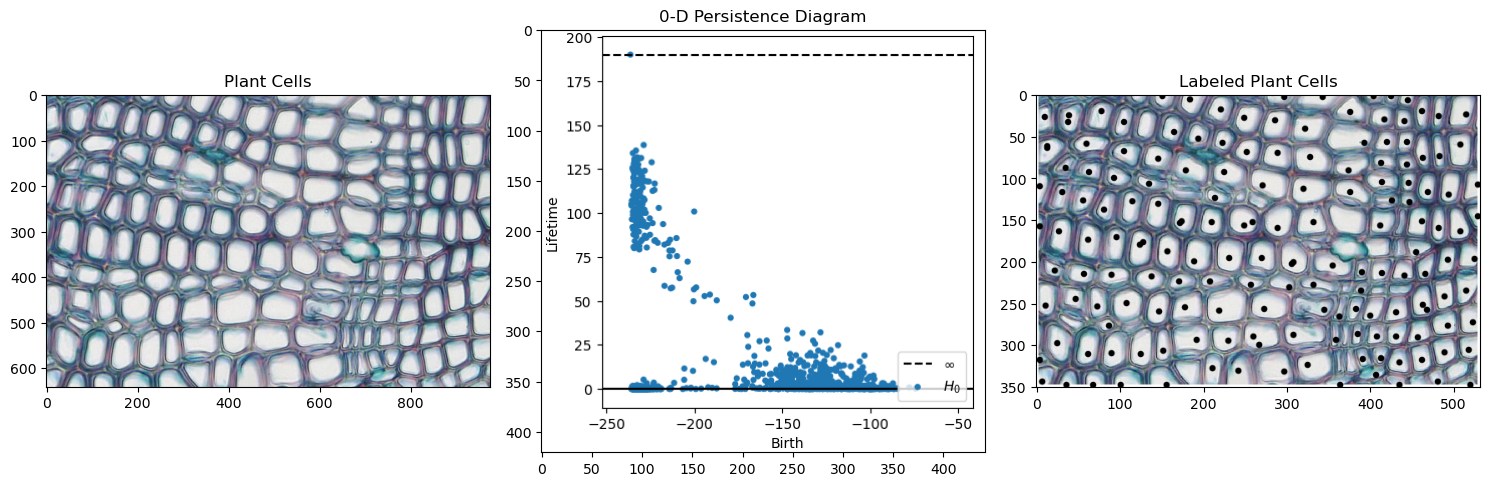

In [69]:
#Example 2: plant cell counting
Cells_im = imageio.imread('TDA_Cells.jpeg')
Cells_Labled_im = imageio.imread('TDA_Cells_Labeled.png')
Cells_PD_im = imageio.imread('Cells_PD.png')

#Plot image and persistence diagrams
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(Cells_im)
plt.title("Plant Cells")

plt.subplot(132)
plt.imshow(Cells_PD_im)
plt.title("0-D Persistence Diagram")

plt.subplot(133)
plt.imshow(Cells_Labled_im)
plt.title("Labeled Plant Cells")

plt.tight_layout()
plt.show()

In the above example, a microscope image of plant cells (left) is labeled using TDA. Using the lower_star_img() function the 0-Dimensional persistence diagram is generated (middle). The points in the diagram with lifetimes longer than 70 are used to label the individual cells in the image (right). This example comes from the documentation for the lower_star_img() function, which can be found here: https://ripser.scikit-tda.org/en/latest/notebooks/Lower%20Star%20Image%20Filtrations.html

Analysis of MNIST Database of handwritten digits:
    
Explain stuff here...


The digits 1,3,4,5,7 are typically drawn so that their 1-dimensional homology is 0-dimensional (i.e. they have no non-contractible loops). 
The digits 0,2,6,9 are typically draw so that their 1-dimensional homology is 1-dimensional (i.e. they have a single non-contractible loop). 
The digit 8 is typically drawn so that its 1-dimensional homology is 2-dimensional (i.e. 8 has two non-contractible loops; one around the top circle and one around the bottom circle).

In [71]:
#import images and their respective labels

images = pd.read_csv('mnist_images_10k.csv.gz', compression='gzip', names=list(range(784))).to_numpy()
labels = np.genfromtxt('mnist_labels_10k.csv', dtype="int")

print(np.shape(images))
print('The images array has 10,000 rows. Each row has the 784 = 28x28 pixel values of an image.')

(10000, 784)
The images array has 10,000 rows. Each row has the 784 = 28x28 pixel values of an image.


8


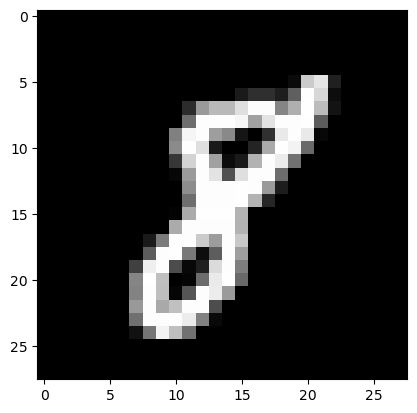

In [72]:
#An example of an image and its label

n = 17
img = np.rint(images[n].reshape(28,28))
plt.imshow(img, cmap="gray")
print(labels[n])

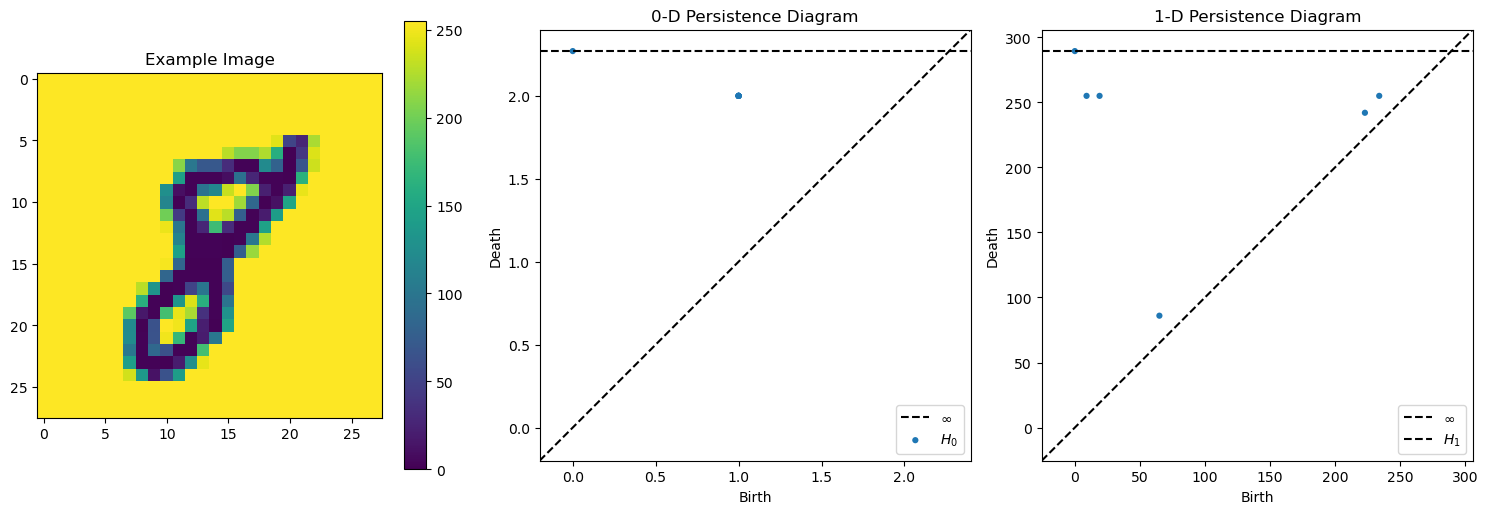

In [73]:
#Calculate persistence diagrams of the example image

neg_img = 255-img #invert the image so the number is dark. This way it is captured in the low sublevelsets. 

dgm = lower_star_img_new(neg_img) #calculates the H_0 and H_1 persistence diagrams of the sublevelset filtration
dgm0 = dgm[0]
dgm1 = dgm[1]
dgm1 = np.vstack((dgm1,[0.,np.inf]))

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(neg_img)
plt.colorbar()
plt.title("Example Image")

plt.subplot(132)
plot_diagrams(dgm0)
plt.title("0-D Persistence Diagram")

plt.subplot(133)
plot_diagrams(dgm1)
plt.title("1-D Persistence Diagram")
plt.legend(["$\infty$","$H_1$"])

plt.tight_layout()
plt.show()

LT0_list_ex = []
LT1_list_ex = []

LT0_list_ex.append(dgm[0][:,1] - dgm[0][:,0]) #list of life times of each point
LT1_list_ex.append(dgm[1][:,1] - dgm[1][:,0])

The points $(b,d)$ in the above persistence diagrams (PD's) describe the "births" and "deaths" of topological features in the sublevelset filtration of the image. The sublevelset filtration is the set $\{x : f(x) \leq t\}$, where $f : {0,1,2,\dots,27} \to \{0,1,2,\dots,255\}$ is the function that assigns a pixel value to each pixel location. In the PD's, the points $(b,d)$ with long lifetimes (i.e. those where $d-b$ is large) are the most significant. For example, in the 1-D PD for the digit 8 above, there are two points with lifetimes that are significantly longer than the others (about 250). Each of those points correspond to one of the two loops that form the 8. 

In [5]:
#makes lists of persistence diagrams and lifetimes (death time - birth time)

dgm_list = []

LT0_list = []
LT1_list = []

for n in range(1000):
    img = np.rint(images[n].reshape(28,28))
    
    neg_img = 255-img #want the number to be dark so it is captured in the lower level sets 

    dgm = lower_star_img_new(neg_img)
    dgm[0] = dgm[0][:-1]
    
    #list of life times of each point
    LT0_list.append(dgm[0][:,1] - dgm[0][:,0]) 
    LT1_list.append(dgm[1][:,1] - dgm[1][:,0])
    
    #store in a list
    dgm_list = dgm_list + [dgm]

In [11]:
#modifies lifetime list in order to classify numbers

LT0_mod_list = []
LT1_mod_list = []
p = .1
q = 50

for i in range(len(LT0_list)):
    if len(LT0_list[i]) != 0:
        temp_max = np.max(LT0_list[i])
        
        bln = (np.abs(LT0_list[i] - temp_max)/temp_max < p) & (LT0_list[i] > q)
        
        temp = LT0_list[i][bln]
        LT0_mod_list.append([temp,labels[i],i]) 
    #else:
         #LT0_0D.append([LT0_list[i],labels[i],i])
        
for i in range(len(LT1_list)):    
    if len(LT1_list[i]) != 0:
        temp_max = np.max(LT1_list[i])
        
        bln = (np.abs(LT1_list[i] - temp_max)/temp_max < p) & (LT1_list[i] > q)
        
        temp = LT1_list[i][bln]
        LT1_mod_list.append([temp,labels[i],i])
    #else:
         #LT1_0D.append([LT1_list[i],labels[i],i])
        
print(len(LT1_mod_list))

[[array([222.]), 6, 13], [array([213.]), 2, 16], [array([236., 246.]), 8, 17], [array([], dtype=float64), 6, 18]]


In [7]:
#sorts the digits that have 0,1,2, or some other number of significant points in their persistence diagrams

LT1_0D = []
LT1_1D = []
LT1_2D = []
LT1_else = []

for i in range(len(LT1_list)):
    if len(LT1_list[i]) == 0:
        LT1_0D.append([LT1_list[i],labels[i],i])

for i in range(len(LT1_mod_list)):
    if len(LT1_mod_list[i][0]) == 1:
        LT1_1D.append(LT1_mod_list[i])
    elif len(LT1_mod_list[i][0]) == 2:
        LT1_2D.append(LT1_mod_list[i])
    else:
        LT1_else.append(LT1_mod_list[i])

1000
(446, 407, 34, 113)


Text(0, 0.5, 'Number of digits')

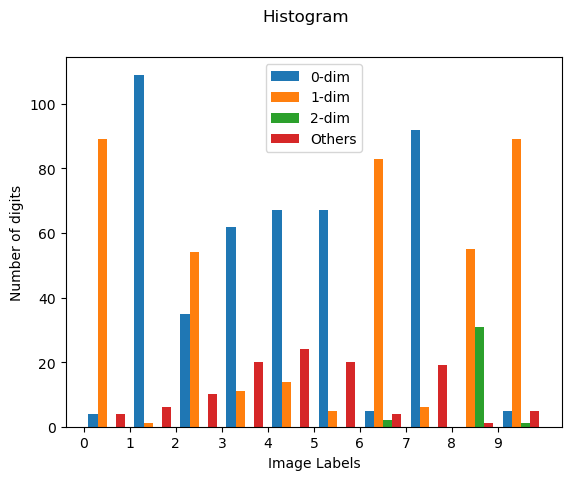

In [8]:
#Makes histograms of the results of the sorting

#Sanity checks
print(len(LT1_0D) + len(LT1_1D) + len(LT1_2D) + len(LT1_else))
print((len(LT1_0D), len(LT1_1D), len(LT1_2D), len(LT1_else)))

Ones = []
for item in LT1_0D:
    Ones.append(item[1])

Zeros = []
for item in LT1_1D:
    Zeros.append(item[1])

Eights = []
for item in LT1_2D:
    Eights.append(item[1])
    
Others = []
for item in LT1_else:
    Others.append(item[1])
    
fig, ax1 = plt.subplots(1, 1)
fig.suptitle('Histogram')

ax1.hist([Ones,Zeros,Eights,Others], bins = [0,1,2,3,4,5,6,7,8,9,10])
ax1.set_xticks(range(10))
ax1.legend(['0-dim','1-dim','2-dim','Others'])
plt.xlabel('Image Labels')
plt.ylabel('Number of digits')

Conclusion:

The above histogram shows that the TDA methods used correctly classifies much of the data set into its correct homology. 

Note that 0,1,5,6,7,9 are some especially sucessful cases considering that the large majority of those digits have the correct homology. The digits 2,4,8 have an honest mix of homologies. In the case of the 2 and 4 this is likely because the 2 is often drawn with or without a loop, and similarly for 4. The case of the 8 is interesting because majority of the 8's have a 1-dimensional homology group, while you expect them to be 2-dimensional. This is most likely due to one of the loops is an elongated and squished circle, which is effectively a line.

The MNIST database is a reletively simple data set. In the event you wanted to do a similar analysis of a more complicated data set, instead of simply trying to count the number of significant points in one or both of the PD's, you could use a dimensionality reduction technique (like PCA) and then use HDBSCAN to cluster the result.